10000
Segment parts:  ['hair', 'faceskin', 'eyes', 'pupils', 'glasses', 'ears', 'nose', 'inmouth', 'u_lip', 'l_lip', 'neck', 'cloth', 'hat']


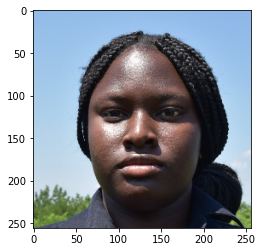

[0 1]


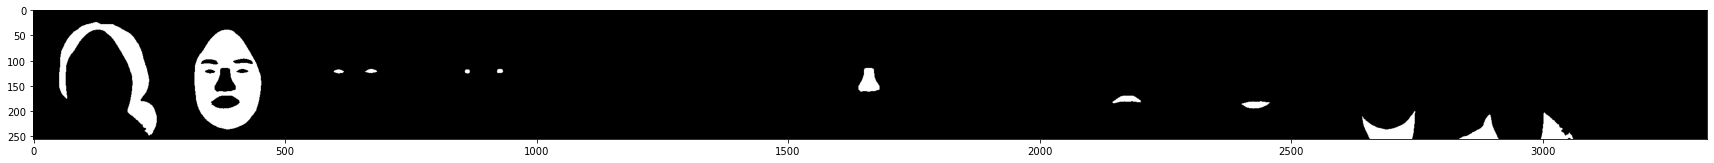

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image

def create_image_grid(images, n_rows=1):
    """
    Creates a grid of images from a list of NumPy arrays.
    
    Parameters:
    - images: List of np.array, each representing an image.
    - n_rows: Number of rows in the grid.
    
    Returns:
    - A matplotlib figure containing the image grid.
    """
    n_images = len(images)
    n_cols = (n_images + n_rows - 1) // n_rows  # Calculate number of columns needed
    
    # Get the height and width of the images (assuming all images are the same size)
    # img_height, img_width = images[0].shape[:2]

    # Add zero images if the number of images is less than needed to fill the grid
    images += [np.zeros_like(images[0]) for _ in range(n_rows * n_cols - n_images)]

    # Check if any images has 3 channels, if so, repeat all 1-channel images to 3-channel images
    for i in range(n_images):
        if len(images[i].shape) == 2:
            images[i] = np.stack([images[i]]*3, axis=-1)
    
    # Create the grid by concatenating images
    rows = []
    for i in range(n_rows):
        row_images = images[i * n_cols:(i + 1) * n_cols]
        rows.append(np.concatenate(row_images, axis=1))
    
    grid_image = np.concatenate(rows, axis=0)
    return grid_image

set_ = 'valid'
path = f'/data/mint/DPM_Dataset/ffhq_256_with_anno/face_segment_preprocessed/fined_parts/{set_}/anno/'

imgs = glob.glob(path + '*.npy')
print(len(imgs))

print("Segment parts: ", open(f'/data/mint/DPM_Dataset/ffhq_256_with_anno/face_segment_preprocessed/fined_parts/segment_parts_{set_}.txt', 'r').read().split())

idx = 5
img_name = imgs[idx].split('/')[-1].split('.')[0].split('_')[-1]
raw = Image.open(f'/data/mint/DPM_Dataset/ffhq_256_with_anno/ffhq_256/{set_}/{img_name}.jpg')
plt.imshow(raw)
plt.show()
img = np.load(imgs[idx])
fig = plt.figure(figsize=(30, 30))
print(np.unique(img))
plt.imshow(create_image_grid([img[..., i]*1.0 for i in range(img.shape[-1])]))
plt.show()